### Create Directed Graph 'D' with 5 Nodes and 5 Edges

number of nodes:  5
number of edges:  5


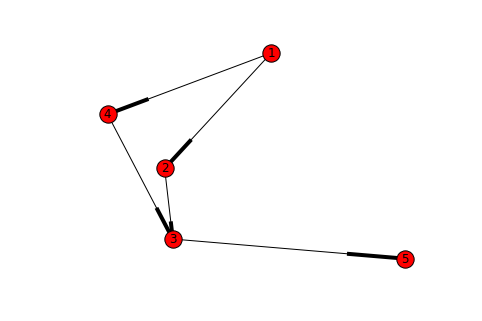

In [81]:
# makes plots appear in python
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import operator

D = nx.DiGraph()
D.add_nodes_from([1,2,3,4,5])
D.add_edges_from([(1,2),(1,4),(2,3),(4,3),(3,5)])

print 'number of nodes: ', D.number_of_nodes()
print 'number of edges: ', D.number_of_edges()

nx.draw(D, with_labels=True)
plt.show()

### Convert from Directed Graph 'D' to Undirected Graph 'U'

number of nodes:  5
number of edges:  5


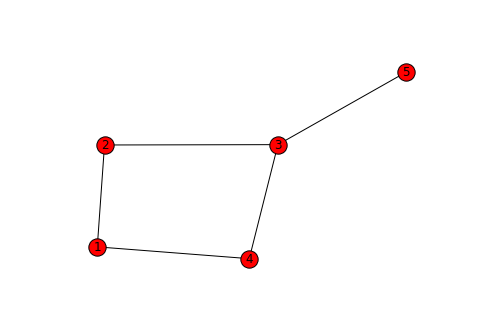

In [5]:
U = D.to_undirected()

print 'number of nodes: ', U.number_of_nodes()
print 'number of edges: ', U.number_of_edges()
nx.draw(U, with_labels=True)
plt.show()

### Comparing Closeness Centrality between 'D' and 'U'

In [111]:
close_cent_dict_D = nx.closeness_centrality(D)
close_cent_dict_U = nx.closeness_centrality(U)

ccd_D = sorted(close_cent_dict_D.iteritems(), key=operator.itemgetter(1), reverse=True)

nodes = [x[0] for x in ccd_D]
ccd_D_vals = [x[1] for x in ccd_D]
ccd_U_vals = [close_cent_dict_U[node] for node in nodes]

data = {'Closeness Centrality Values for D': ccd_D_vals,
        'Closeness Centrality Values for U': ccd_U_vals,
       }
df = pd.DataFrame(data, index=nodes)

print 'sorted by greatest closeness centrality values for D'
df

sorted by greatest closeness centrality values for D


,Closeness Centrality Values for D,Closeness Centrality Values for U
1,0.571429,0.571429
2,0.333333,0.666667
4,0.333333,0.666667
3,0.250000,0.800000
5,0.000000,0.500000


### Comparing Eigenvector Centrality between 'D' and 'U'
##### This fails on U 
##### Increasing the max_iteration also fails
##### Do NOT use 'eigenvector_centrality_numpy(graph_object)', as this produces different values every time it's ran (unreliable)

In [107]:
eigen_cent_dict_D = nx.eigenvector_centrality(D)

try:
    eigen_cent_dict_U = nx.eigenvector_centrality(U)
except Exception:
    print 'could NOT compute eigenvector centrality for U'
    pass

ecd_D = sorted(eigen_cent_dict_D.iteritems(), key=operator.itemgetter(0))

nodes = [x[0] for x in ecd_D]
ecd_D_vals = [x[1] for x in ecd_D]

data = {'Eigenvector Centrality Values for D': ecd_D_vals}
df = pd.DataFrame(data, index=nodes)
df

could NOT compute eigenvector centrality for U


,Eigenvector Centrality Values for D
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


### Comparing Betweenness Centrality between 'D' and 'U'

In [112]:
between_cent_dict_D = nx.betweenness_centrality(D)
between_cent_dict_U = nx.betweenness_centrality(U)

bcd_D = sorted(between_cent_dict_D.iteritems(), key=operator.itemgetter(1), reverse=True)

nodes = [x[0] for x in bcd_D]
bcd_D_vals = [x[1] for x in bcd_D]
bcd_U_vals = [between_cent_dict_U[node] for node in nodes]

data = {'Betweenness Centrality Values for D': bcd_D_vals,
        'Betweenness Centrality Values for U': bcd_U_vals,
       }
df = pd.DataFrame(data, index=nodes)

print 'sorted by greatest betweenness centrality values for D'
df

sorted by greatest betweenness centrality values for D


,Betweenness Centrality Values for D,Betweenness Centrality Values for U
3,0.250000,0.583333
2,0.083333,0.166667
4,0.083333,0.166667
1,0.000000,0.083333
5,0.000000,0.000000


### Comparing Page Rank between 'D' and 'U'

In [113]:
page_rank_dict_D = nx.pagerank(D)
page_rank_dict_U = nx.pagerank(U)

prd_D = sorted(page_rank_dict_D.iteritems(), key=operator.itemgetter(1), reverse=True)

nodes = [x[0] for x in prd_D]
prd_D_vals = [x[1] for x in prd_D]
prd_U_vals = [page_rank_dict_U[node] for node in nodes]

data = {'Page Rank Values for D': prd_D_vals,
        'Page Rank Values for U': prd_U_vals,
       }
df = pd.DataFrame(data, index=nodes)

print 'sorted by greatest page rank values for D'
df

sorted by greatest page rank values for D


,Page Rank Values for D,Page Rank Values for U
5,0.349602,0.113332
3,0.306083,0.294111
2,0.127441,0.197389
4,0.127441,0.197389
1,0.089432,0.197780


### Comparing Hubs between 'D' and 'U'

In [114]:
# tuple of two dictionaries ({node: hubs value, ...} , {node: authorities value, ...})
hubs_auths_dict_D = nx.hits(D)
hubs_auths_dict_U = nx.hits(U)

# dictionary of just {node: hubs value, node: hubs value, ...}
hubs_dict_D = hubs_auths_dict_D[0]
hubs_dict_U = hubs_auths_dict_U[0]

hd_D = sorted(hubs_dict_D.iteritems(), key=operator.itemgetter(1), reverse=True)

nodes = [x[0] for x in hd_D]
hd_D_vals = [x[1] for x in hd_D]
hd_U_vals = [hubs_dict_U[node] for node in nodes]

data = {'Hubs Values for D': hd_D_vals,
        'Hubs Values for U': hd_U_vals,
       }
df = pd.DataFrame(data, index=nodes)

print 'sorted by greatest hubs values for D'
df

sorted by greatest hubs values for D


,Hubs Values for D,Hubs Values for U
1,3.333333e-01,0.179806
2,3.333333e-01,0.230291
4,3.333333e-01,0.230291
3,2.483527e-09,0.230291
5,0.000000e+00,0.129321


### Comparing Authorities between 'D' and 'U'

In [116]:
# dictionary of just {node: authorities value, node: authorities value, ...}
auths_dict_D = hubs_auths_dict_D[1]
auths_dict_U = hubs_auths_dict_U[1]

ad_D = sorted(auths_dict_D.iteritems(), key=operator.itemgetter(1), reverse=True)

nodes = [x[0] for x in ad_D]
ad_D_vals = [x[1] for x in ad_D]
ad_U_vals = [auths_dict_U[node] for node in nodes]

data = {'Authorities Values for D': ad_D_vals,
        'Authorities Values for U': ad_U_vals,
       }
df = pd.DataFrame(data, index=nodes)

print 'sorted by greatest authorities values for D'
df

sorted by greatest authorities values for D


,Authorities Values for D,Authorities Values for U
3,5.000000e-01,0.280776
2,2.500000e-01,0.195194
4,2.500000e-01,0.195194
5,3.725290e-09,0.109612
1,0.000000e+00,0.219224
